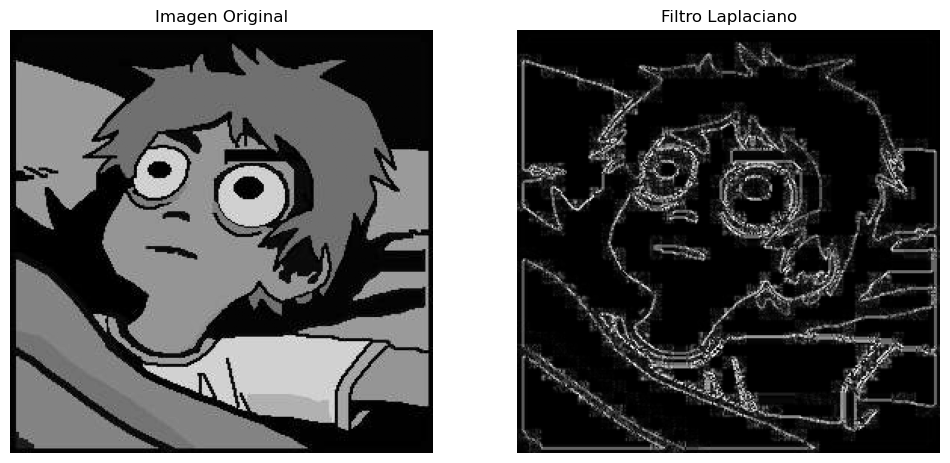

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

laplacian_abs = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(122), plt.imshow(laplacian_abs, cmap='gray')
plt.title('Filtro Laplaciano'), plt.axis('off')

plt.show()

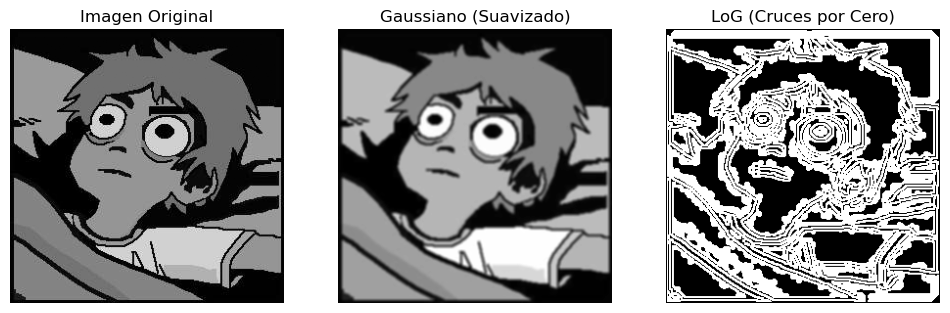

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

zero_crossings = np.zeros_like(laplacian)
rows, cols = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
       
        neighbors = [
            laplacian[i-1, j], laplacian[i+1, j],  
            laplacian[i, j-1], laplacian[i, j+1], 
            laplacian[i-1, j-1], laplacian[i-1, j+1],  
            laplacian[i+1, j-1], laplacian[i+1, j+1]
        ]
        if any(np.sign(laplacian[i, j]) != np.sign(n) for n in neighbors):
            zero_crossings[i, j] = 255

plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(blurred, cmap='gray')
plt.title('Gaussiano (Suavizado)'), plt.axis('off')

plt.subplot(133), plt.imshow(zero_crossings, cmap='gray')
plt.title('LoG (Cruces por Cero)'), plt.axis('off')

plt.show()